In [71]:
import pandas as pd
import torch 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim

In [72]:
torch.manual_seed(42)

In [73]:
#check for gpu 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [74]:
df = pd.read_csv("../ANN/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [75]:
df.shape

(6000, 785)

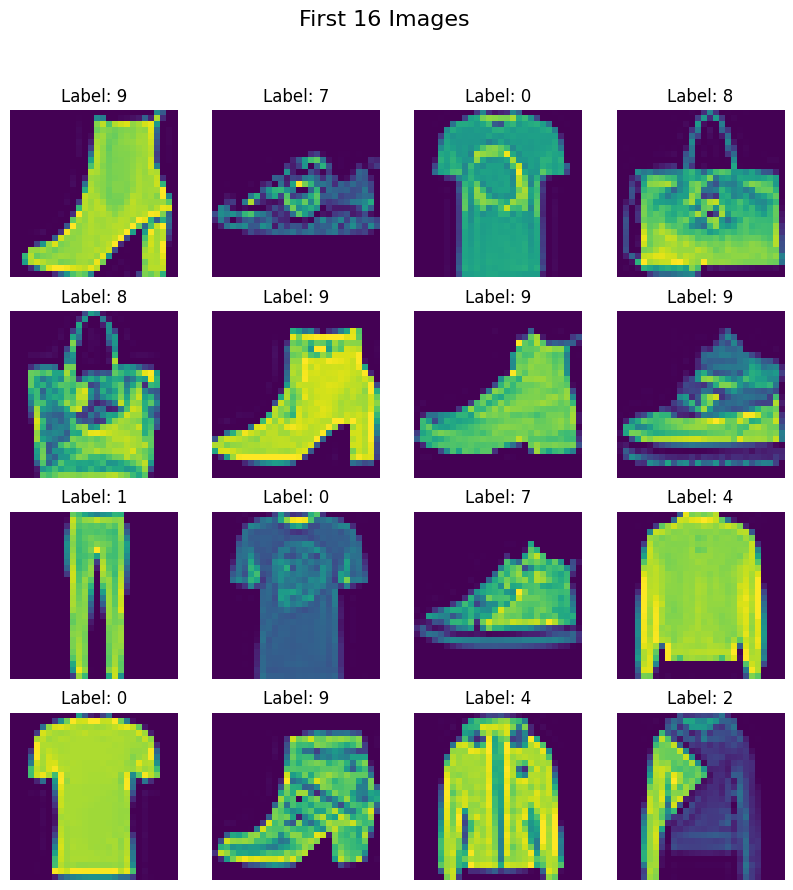

In [76]:
#data visualization 
fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 Images",fontsize=16)

for idx,ax in enumerate(axes.flat):
    img = df.iloc[idx,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[idx,0]}")


In [77]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [79]:
#scaling
X_train = X_train/255
X_test = X_test/255

In [80]:
len(X_train)

4800

In [81]:
# custom Dataset Class
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features = torch.tensor(features,dtype=torch.float32)
        self.labels = torch.tensor(labels,dtype=torch.int64)

    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, index):
        return (self.features[index],self.labels[index])

In [82]:
train_dataset = CustomDataset(X_train,y_train)
test_dataset = CustomDataset(X_test,y_test)

In [83]:
train_dataset.labels.dtype

torch.int64

In [84]:
len(train_dataset)

4800

In [85]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [86]:
len(train_loader)

150

In [ ]:
for i in train_loader:
    
    data, labels = i   # Unpack the batch into data and labels

    print("type of data",data.dtype) 
    print("type of label",labels.dtype)
    print("Data shape:", data.shape)
    print("Labels shape:", labels.shape)
    break

type of data torch.float32
type of label torch.int64
Data shape: torch.Size([32, 784])
Labels shape: torch.Size([32])


In [88]:
#model 
class myNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,68),
            nn.ReLU(),
            nn.Linear(68,10)
        )
    def forward(self,features):
        out = self.network(features)
        return out
    
    

In [89]:
model = myNN(X_train.shape[1])
model = model.to(device)

In [90]:
for i in model.parameters():
    print(i)
    print(i.shape)
    break

Parameter containing:
tensor([[-0.0078,  0.0072, -0.0174,  ..., -0.0354,  0.0187,  0.0085],
        [-0.0182,  0.0344, -0.0162,  ...,  0.0017,  0.0045,  0.0133],
        [-0.0108, -0.0213,  0.0084,  ...,  0.0273, -0.0081,  0.0026],
        ...,
        [-0.0245,  0.0124, -0.0021,  ...,  0.0221, -0.0158, -0.0230],
        [-0.0156, -0.0229, -0.0272,  ...,  0.0342,  0.0240, -0.0346],
        [-0.0216, -0.0346, -0.0113,  ...,  0.0265,  0.0242,  0.0036]],
       device='cuda:0', requires_grad=True)
torch.Size([128, 784])


In [91]:
#imp parameters
epochs = 100 
lr = 0.1


In [92]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=lr)

In [93]:
#training loop

for epoch in range(epochs):
    epoch_loss = 0
    for features,labels in train_loader:
        features,labels = features.to(device),labels.to(device)
        y_pred = model(features)
        # print(y_pred.dtype)
        # print(labels.dtype)
        # break
        
        loss = criterion(y_pred,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    
    print(f"Epoch:{epoch+1} , loss: {epoch_loss/len(train_loader)}")  
        

Epoch:1 , loss: 1.3173951025803883
Epoch:2 , loss: 0.7957653286059697
Epoch:3 , loss: 0.667195637623469
Epoch:4 , loss: 0.5798612954219182
Epoch:5 , loss: 0.5405569182833035
Epoch:6 , loss: 0.5189370913306872
Epoch:7 , loss: 0.47773022184769315
Epoch:8 , loss: 0.4449320446451505
Epoch:9 , loss: 0.427760245402654
Epoch:10 , loss: 0.4123344192902247
Epoch:11 , loss: 0.39147598604361217
Epoch:12 , loss: 0.37400519371032714
Epoch:13 , loss: 0.3590388261775176
Epoch:14 , loss: 0.3319849592447281
Epoch:15 , loss: 0.33146751354138054
Epoch:16 , loss: 0.31969207505385083
Epoch:17 , loss: 0.3029890421032906
Epoch:18 , loss: 0.3041254980737964
Epoch:19 , loss: 0.27968144660194716
Epoch:20 , loss: 0.26500257519384224
Epoch:21 , loss: 0.26479693154493966
Epoch:22 , loss: 0.24734565029541652
Epoch:23 , loss: 0.23946399005750815
Epoch:24 , loss: 0.24202585031588872
Epoch:25 , loss: 0.2250100729862849
Epoch:26 , loss: 0.22008784654239813
Epoch:27 , loss: 0.22178480866054695
Epoch:28 , loss: 0.2096542

In [94]:
model.eval()

myNN(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=68, bias=True)
    (3): ReLU()
    (4): Linear(in_features=68, out_features=10, bias=True)
  )
)

In [96]:
correct = 0
with torch.no_grad():
    for batch_features,batch_labels in test_loader:
        batch_features,batch_labels = batch_features.to(device),batch_labels.to(device)
        y_pred = model(batch_features)
        # print(y_pred)
        # print(y_pred.shape)
        _,y_pred = torch.max(y_pred,1)

        correct += (y_pred == batch_labels).sum().item()
    acc = correct / len(test_dataset)
    print("Accuracy ",acc)
        
        
        

Accuracy  0.8408333333333333
